<a id='top'></a>

# Homework 5: Bootstrap, Hypothesis Testing and Regression
***

**Name**: Tyler Valentine

***

This assignment is due on Moodle by **5 PM on Friday April 19**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) 

---

In [348]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [15 points] Problem 1 - Hypothesis Testing Whether your Co-worker is a Doofus 

You are working as a Data Scientist for an internet-based hedgehog deliver company. Your co-worker, Daley Jennanigans, is a lovable scamp! Unfortunately, Daley also makes a lot of mistakes throughout the day as the two of you team up to tackle some inference work regarding your company's hedgehog-loving customers. In each case, clearly explain why Daley's hypothesis testing setup or conclusion is incorrect.

**Part A**: Daley has some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the proportion of last month's website visitors that bought a hedgehog. Let $X$ be the random variable describing the number of website visitors who bought a hedgehog in the previous month, and suppose that the population proportion of visitors who bought a hedgehog is $p$. Daley is interested to see if the data suggests that more than 20% of website visitors actually buy a hedgehog.  He decides to perform the test with a null hypothesis of $H_0: \hat{p} = 0.20$. 

**ANSWER: PART A**

$\hat{p}$ represents a sample proportion, however, when we are making a null hypothesis we want to use a population proportion denoted simply by the letter p.

**Part B**: Daley decides instead to do his hypothesis test with a null hypothesis of $H_0: p < 0.20$.  

**ANSWER: PART B**

Since Daley is interested in determining if MORE THAN 20% of visitors are actually buying a hedgehog a null hypothesis of p < .20 will not be useful. Instead, Daley would want a null hypothesis of p = .20 and an alternate hypothesis of p > .20.

**Part C**: Now Daley is finally on track with reasonable hypotheses of $H_0: p = 0.20$ and $H_1: p > 0.20$. Daley computes for the sample proportion a normalized test-statistic of $z = 2.4$ and states that since $z = 2.4 > 0.01$ there is insufficient statistical evidence at the $\alpha = 0.01$ significance level to conclude that the proportion of customers who buy a hedgehog is greater than 20%.

**ANSWER: PART C**

Daley forgot a step! He would want to compare his p-value, not his z-value, to his $\alpha$ value in order to determine whether or not to reject his null hypothesis. He would need to compute this p-value by subtracting the cdf (stats.norm.cdf) of his z-value from 1. In this case his p-value is around .0082 which is less than .01 meaning he should reject his null hypothesis and conclude that there is statistical evidence that the proportion of customers who buy a hedgehog is greater than 20%

**Part D**: Daley is again conducting the hypothesis test of $H_0: p = 0.20$ and $H_1: p > 0.20$, and found the test-statistic $z=2.4$. Daley computes his p-value as:
$$\text{p-value} = \texttt{stats.norm.cdf(2.4)} = 0.9918$$

Since his p-value (0.9918) is greater than the significance level (0.01), Daley again claims that there is insufficient evidence at the 1% significance level to conclude that the proportion of customers who buy a hedgehog is greater than 20%.

**ANSWER PART D**

As noted above, Daely would need to subtract his calculated cdf value for z from 1 in order to get his p-value. He would get .0082 instead and determine that there is evidence at the 1% significance level to conclude that the proportion of customers who buy a hedgehog is greater than 20%.

**Part E**: Daley is again conducting the hypothesis test of $H_0: p = 0.20$ and $H_1: p > 0.20$. Suppose he computes a p-value of $0.03$, and then concludes that there is only a 3% probability that the null hypothesis is true. 

**ANSWER PART E**

Daley, Daley, Daley... This is a common misconception among amature StatWizards but is false. What the p-value is actually indicating is the probability of getting a test statistic more extreme than the one that was calculated given that the null hypothesis is true.

<br>

---
[Back to top](#top)
<a id='p2'></a>

### [25 points] Problem 2 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be approximately normally distributed. The mean reaction times (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 95% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Set up your calculations by hand, and report the results in Markdown/MathJax. Of course, you can and should use Python as a calculator.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

In [349]:
def conInt(mean,sd):
    t = stats.t.ppf(.975,df = 9)
    n = np.sqrt(10)
    CIL = mean - (t * (sd/n))
    CIH = mean + (t * (sd/n))
    return(CIL,CIH)

CN = conInt(451.3,31.9)
C = conInt(494.2,39.6)
N = conInt(492.8,45.2)

print(stats.t.ppf(.975,df = 9))

print(CN)
print(C)
print(N)

2.2621571627409915
(428.48011470011295, 474.1198852998871)
(465.8718665242781, 522.5281334757218)
(460.46586785094377, 525.1341321490563)


**ANSWER PART A**

Our t value will be:

stats.t.ppf(.975, df = 9) where the 9 represents our number of measurements minus one. This is equal to 2.2621571627409915

$\sqrt{n} = \sqrt{10} = 3.162278$

Confidence Intervals for each sample we will be:
   
   Coffee:
   
   $494.2 \pm 2.2621571627409915 * (\tfrac{39.6}{3.162278}) = (465.872,522.528)$
   
   Nap:
   
   $492.8 \pm 2.2621571627409915 * (\tfrac{45.2}{3.162278}) = (460.466,525.134)$
   
   Coffee and Nap:
   
   $451.3 \pm 2.2621571627409915 * (\tfrac{31.9}{3.162278}) = (428.480,474.120)$

**1**

Because these confidence intervals overlap, we cannot say anything definative about the data.

**2**

We use a t-distribution because our sample size is small. Specifically, smaller than 30.

**Part B**: Use a **rejection region hypothesis test** to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Note** that the number of degrees of freedom for a two-sample t-test is $df_1 + df_2 = (n_1-1) + (n_2-1) = n_1 + n_2 - 2$ (where $n_1$ and $n_2$ are the number of data points from each of the two samples). All other mechanics are the same as the two-sample z-tests we know and love.

In [350]:
def rejreg(mean1,sd1,mean2,sd2):
    v = 18
    sp = np.sqrt(((9*sd1)+(9*sd2))/v)
    t = np.absolute((mean2-mean1) / (sp * np.sqrt(2/9)))
    T = stats.t.ppf(.975, df=18)
    if(t > T):
        print("REJECT!")
    else:
        print("Don't Reject")
    return t,T

rejreg(494.2,39.6,492.8,45.2)

Don't Reject


(0.4560908549012154, 2.10092204024096)

**ANSWER PART B**

$H_0: \mu_1 = \mu_2$

$H_1: \mu_1 \ne \mu_2$

Because t < T we fail to reject the Null Hypothesis. Thus, we can say there is no evidence to conclude that taking a nap promotes faster reaction times than drinking coffee.

**Part C**: Perform an appropriate hypothesis test (you may use either p-values or rejection region) to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap. So, there should be two separate hypothesis tests, but they are seeking to show similar results (one for coffee-nap versus coffee-only, and one for coffee-nap versus nap-only). Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

In [351]:
rejreg(494.2,39.6,451.3,31.9)
rejreg(492.8,45.2,451.3,31.9)

REJECT!
REJECT!


(14.1788876866674, 2.10092204024096)

**ANSWER PART C**
In both cases, t > T and we will reject the Null Hypothesis. Ergo, we can say that there is evidence to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee or only taking a nap!

**Part D:** Is there sufficient evidence at the 95% confidence (5% significance) level to support claim that the reaction time after a coffee-nap is at least 20 ms faster than the reaction time after a coffee only? Fully justify your answer and show all work demonstrating this conclusion using a **p-value hypothesis test**. 

In [352]:
s = np.sqrt(((9*(39.6**2)) + (9*(31.9**2)))/18)
print(s)
se = s * np.sqrt(2/10)
print(se)
t = (494.2-451.3)/(se)
p = 1-stats.t.cdf(t,df = 18)
p = p*2
print(p)

35.956710083098535
16.08032959861209
0.015685140891921634


**ANSWER PART D**

$H_0: \mu_1 - \mu_2 = 20$

$H_1: \mu_1 - \mu_2 > 20$

Because our p value is less than .05 we will reject the null hypothesis and conclude that the reaction time after a coffee nap is at least 20ms faster than the reaction time after coffee only. 


**Part E**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

In [353]:
sd = 31.9
low = stats.chi2.ppf(.025, 9)
high = stats.chi2.ppf(.975, 9)
CIL = np.sqrt((9*31.9)/high)
CIH = np.sqrt((9*31.9)/low)
print(CIL,CIH)

3.8848990933389387 10.31106182595958


**ANSWER PART E**

The 95% confidence interval for the standard deviation of reaction time for coffee-nap takers is (3.8849, 10.3111).

<br>

---
[Back to top](#top)
<a id='p3'></a>

### [40 points] Problem 3 - Simple Linear Regression for Science!

From [Google Trends](https://trends.google.com/trends/?geo=US) data, it appears that interest in "science" in the United States has been waning since about 2004. Interest is measured relative to the maximum rate of Google searches for that term over the time period (so the maximum is 100). 

**Part A:** Load up the data in `science_interest.csv` into a Pandas DataFrame. Create two new columns:
* `year` should be the year associated with that data point, and
* `month` should be the month (1-12) associated with that data point.

Then, make a **scatter plot** (using `pyplot.scatter`) of all of the data points, showing how interest in "science" has evolved over time. Label only the data point associated with January of each even year, and label with the year (and of course be sure to label your axes).

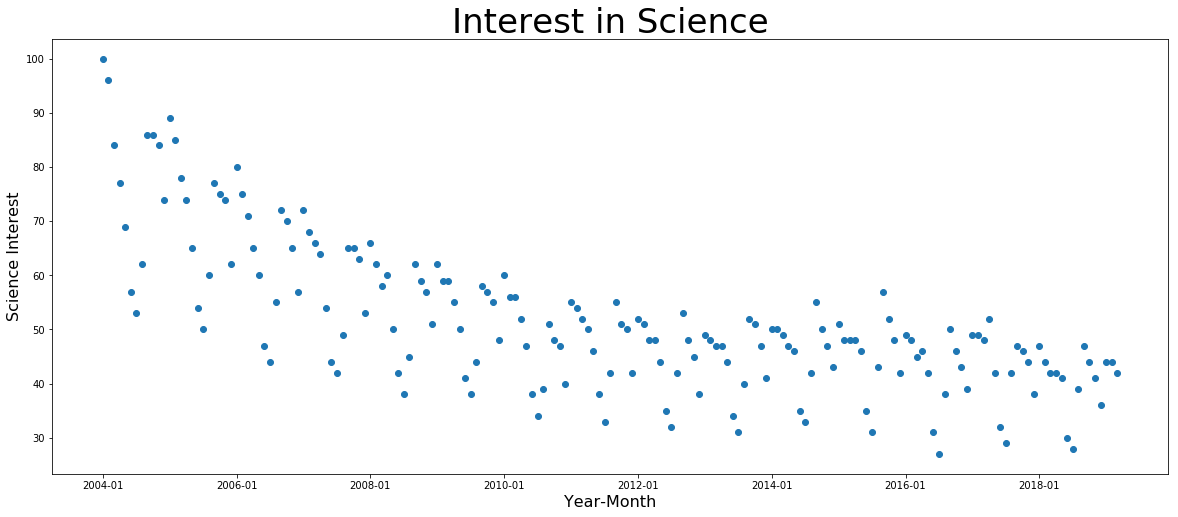

In [354]:
df = pd.read_csv("science_interest.csv", names = ["Date", "Science"])
df = df.drop([0,1])
df[['Year','Month']] = df.Date.str.split("-",expand=True,)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]
df = df[cols]

dfscience = df['Science']
science = list(dfscience)
dfdate = df['Date']
date = list(dfdate)

dfSx = df.loc[(df['Date'] == '2004-01') | (df['Date'] == '2006-01') | (df['Date'] == '2008-01') | (df['Date'] == '2010-01') | (df['Date'] == '2012-01') | (df['Date'] == '2014-01') | (df['Date'] == '2016-01') | (df['Date'] == '2018-01')]
Sxdate = dfSx['Date']
Sxdate = list(Sxdate)
pos = [0,24,48,72,96,120,144,168]

for i in range(len(science)):
    science[i] = int(science[i])

fig, ax = plt.subplots(figsize=(20,8))
plt.xticks(pos,Sxdate);
plt.scatter(x = date, y = science);
ax.set_title("Interest in Science", fontsize = 34);
ax.set_xlabel("Year-Month", fontsize = 16);
ax.set_ylabel("Science Interest", fontsize = 16);


#dfyear = df['Year']
#year = list(dfyear)


**Part B:** These data (and the sea-level data from Homework 4) are a **time series**, where the independent variable is *time* and the dependent quantity is interest in science. One of the central assumptions of linear regression is that the data are observations generated by some process, independently of one another. With time series data, we need to be careful because there could be some other process affecting the output data. In particular, **annual cycles** are patterns that reoccur each year and are frequently present in time series data. For example, seasonal patterns of weather are annual cycles.

To see what kind of effect time has, make a **line plot** (using `pyplot.plot`) of the interest in science, as a function of time. Again, include all of the data points and, for the x-axis, label only the tick marks associated with January of even years, and be sure to label your axes.

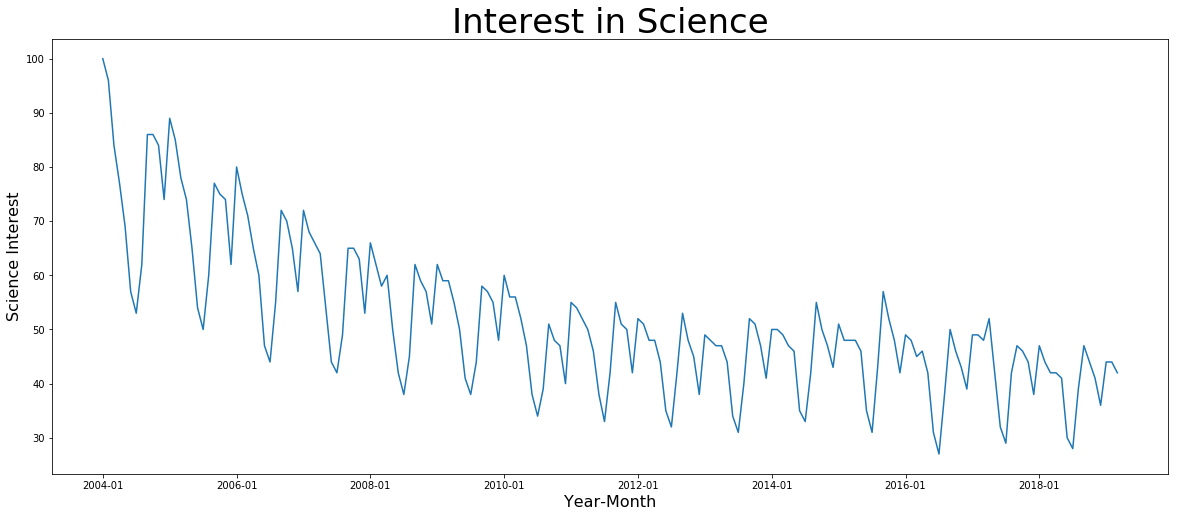

In [355]:
df.Year = df.Year.astype(np.int64)
df.Month = df.Month.astype(np.int64)
df.Science = df.Science.astype(np.int64)

fig, ax = plt.subplots(figsize=(20,8))
plt.xticks(pos,Sxdate);
plt.plot(date, science);
ax.set_title("Interest in Science", fontsize = 34);
ax.set_xlabel("Year-Month", fontsize = 16);
ax.set_ylabel("Science Interest", fontsize = 16);

**Part C:** Does your plot from Part B suggest that there is some annual cycle to the interest in science? During which months is interest in science highest? What about lowest? Justify your answers using your plot, **and** by computing the mean interest in science for each month. So, compute 12 values and report them in a table. Do **not** just spit out a horizontal list of 12 numbers. That would be yucky to try to read, and we're scientists, dammit.

What do you think accounts for the drop(s) in interest in science during those month(s)? Recall that these data are from the United States.

In [356]:
meanlist = []
for i in range (12):
    df2 = df.loc[df['Month'] == (i+1)]
    meanlist.append(df2.Science.mean())

data = [['January',meanlist[0]], ['February',meanlist[1]], ['March', meanlist[2]], ['April',meanlist[3]], ['May',meanlist[4]], ['June',meanlist[5]], ['July',meanlist[6]], ['August',meanlist[7]], ['September',meanlist[8]], ['October',meanlist[9]], ['November',meanlist[10]], ['December',meanlist[11]]]
dfmeanMonth = pd.DataFrame(data, columns = ['Month', 'Interest'])

dfmeanMonth

,Month,Interest
0,January,60.937500
1,February,58.562500
2,March,55.812500
3,April,55.133333
4,May,49.733333
5,June,39.533333
6,July,36.200000
7,August,45.466667
8,September,59.133333
9,October,56.533333


**ANSWER PART C**

Yes, it does appear there is a cyclical interest in science. During summer when schools are not in session and people are spending time outside, interest in science wanes. During colder months, when people are getting their learnin' on, interest in science goes up... except for December which is for egg nog and Holidays!

**Part D:** (Spoiler alert!) Since there seems to be an annual cycle, one of the fundamental assumptions of our simple linear regression model is not satisfied. Namely, it is not the case that the model-data residuals, $\epsilon_i$, are independent of one another.

So, we need to process our data a bit further before fitting a regression model. One way to address this is to take the mean of all the data each year and use for analysis the time series of annual mean interest in science. Create a new Pandas DataFrame that consists only of two columns:
* `year`, and
* `interest`, the mean interest in science from the twelve months in that year.

In [357]:
meanlist2 = []
for i in range (16):
    df2 = df.loc[df['Year'] == (i+2004)]
    meanlist2.append(df2.Science.mean())

data2 = [['2004',meanlist2[0]], ['2005',meanlist2[1]], ['2006',meanlist2[2]], ['2007',meanlist2[3]], ['2008',meanlist2[4]], ['2009',meanlist2[5]], ['2010',meanlist2[6]], ['2011',meanlist2[7]], ['2012',meanlist2[8]], ['2013',meanlist2[9]], ['2014',meanlist2[10]], ['2015',meanlist2[11]], ['2016',meanlist2[12]], ['2017',meanlist2[13]], ['2018',meanlist2[14]], ['2019',meanlist2[15]]]
dfmeanYear = pd.DataFrame(data2, columns = ['Year', 'Interest'])

dfmeanYear

,Year,Interest
0,2004,77.333333
1,2005,70.250000
2,2006,63.416667
3,2007,58.750000
4,2008,54.166667
5,2009,52.166667
6,2010,47.333333
7,2011,47.333333
8,2012,44.666667
9,2013,44.250000


**Part E:** Perform a simple linear regression with `year` as the feature and `interest` as the response (mean annual interest in science).  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

Then make a scatter plot of the mean annual interest in science as a function of year, and overlay the estimated regression line. Label your axes and provide a legend.

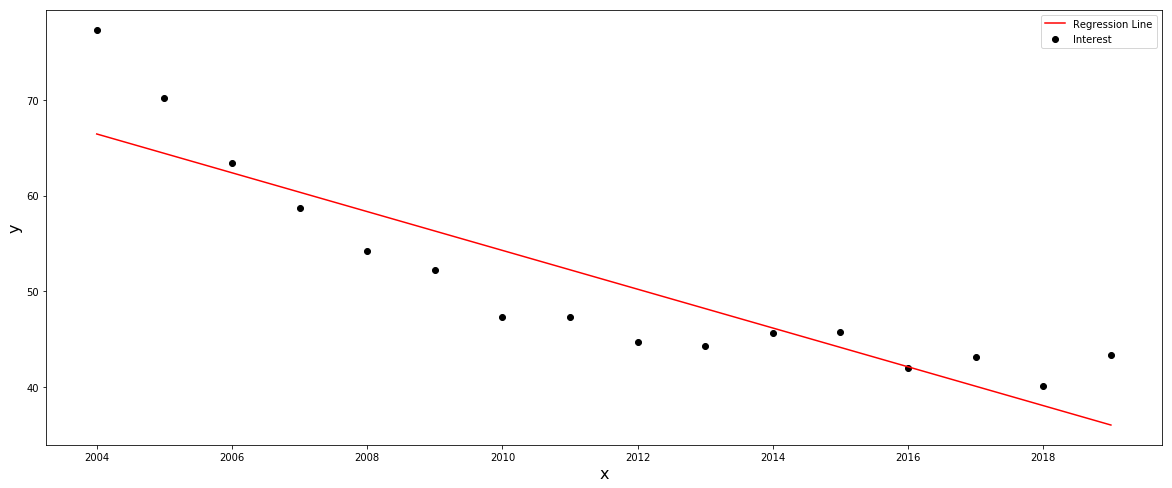

In [358]:
dfmeanYear.Year = dfmeanYear.Year.astype(np.int64)
slope, intercept, r_value, p_value, std_err = stats.linregress(dfmeanYear["Year"], dfmeanYear["Interest"])

x = dfmeanYear['Year']
y = dfmeanYear['Interest']
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(20,8))
ax.scatter(x,y,marker='o',color = 'black',label="Interest")
ax.plot(x,intercept+x*slope,color = 'r',label="Regression Line")
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)
plt.legend();

**Part F**: Give a physical interpretation of the coefficient $\hat{\beta}$, estimated from your model. Include addressing whether the relationship between time and interest in science is positive or negative. Fully justify your responses.

**ANSWER PART F**

$\hat{\beta}$ is the slope of the fitted regression line which is used to evaluate the relationship between the predictor variable and response variable (or x and y). From the look of the model we can say that interest in science has decreased from 2004 to 2019 because we have an obvious negative slope to our line.

**Part G**: What interest in science does your simple linear regression model predict in the year 2030? What about in 2050? What are potential drawbacks to this model for interest in science?

In [359]:
y2030 = intercept+2030*slope
y2050 = intercept+2050*slope
print("Interest in 2030 will be:", y2030,"Interest in 2050 will be:", y2050)


Interest in 2030 will be: 13.695710784313633 Interest in 2050 will be: -26.875367647059647


**ANSWER PART G**

Interest in 2030 will be: 13.695710784313633 and interest in 2050 will be: -26.875367647059647. Obviously there can't be negative interest in science so we can assume that the level of interest will begin to level out as it approaches 0.

**Part H:** Compute a 66% confidence interval for the slope parameter, $\beta$, ***by hand***. This means performing all calculations yourself in Python, as opposed to calling a simple Python function that gives you the result. Why is this a confidence interval for $\beta$ and not for $\hat{\beta}$?

In [360]:
t = stats.t.ppf(.83,df = 14)
CIL = slope - (t * std_err)
CIH = slope + (t * std_err)
print(CIL,CIH)

-2.3074770282745676 -1.749630814862687


**ANSWER PART H**

Our confidence interval for $\beta$ is : (-2.307477, -1.749631). This is the confidence interval for $\beta$ and not $\hat{\beta}$ because it represents the true regression line and not the fitted regression line. 

**Part I:** What proportion of the variation in mean annual interest in science is explained by your linear regression model?

In [361]:
r = r_value**2
print (r)

0.7866326755553371


**ANSWER PART I**

The proportion of the variation in mean annual interest in science explanied by my linear regression model is approximately 78.66%.

**Part J:** Make a scatter plot of the residuals from this simple linear regression model, relative to the annual mean interest data (and be sure to label your axes). Make a conjecture about what kind of additional feature, also based on `year`, should be added to improve the fit of the model. Note that this new model with have your new feature _and_ `year`, making it a _multiple linear regression_ model.

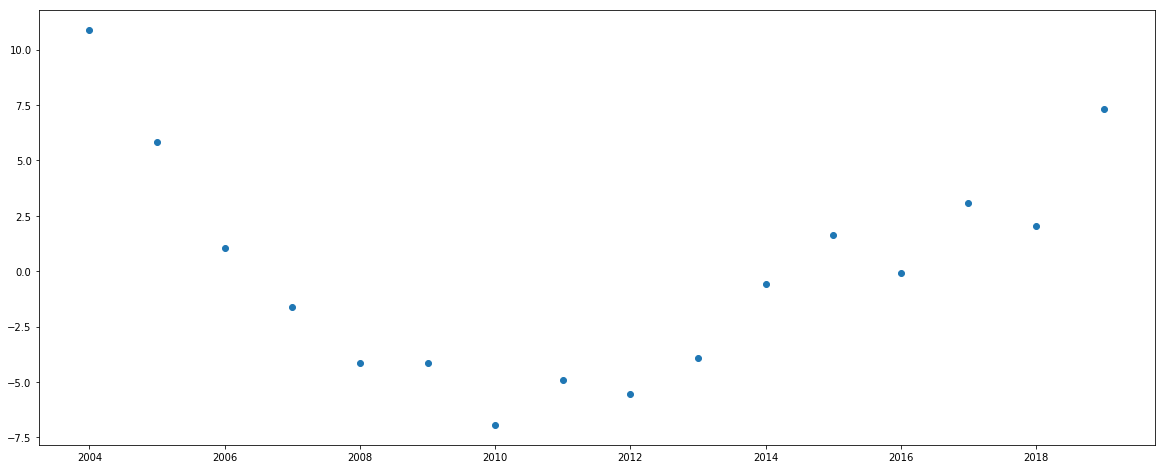

In [362]:
res = []
SI = dfmeanYear['Interest']
SI = list(SI)
for i in range (16):
    res.append(SI[i]-(intercept+(2004+i)*slope))
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(20,8))
plt.scatter(x = dfmeanYear['Year'], y = res);

**ANSWER PART J**

In order to improve the model we would want to introduce a feature that caused our predictive value to be higher at the beginning and end of our timeframe and lower in the middle years of our timeframe. One could imagine a situation where there were a slew of significant scientific breakthroughs from 2004-2005 and from 2017-2019 that peaked interest in science at the time and a severe lack of such breakthroughs from 2007-2014. If we incorporated these breakthroughs, or lack thereof, into our model it would result in a better fit (decreased residuals).

<br>

---
[Back to top](#top)
<a id='p4'></a>

### [20 points] Problem 4 - Choose-Your-Own Simple Linear Regression Adventure

The interest in science data from the previous problem was from [Google Trends](https://trends.google.com/trends/?geo=US). From that main page, you can enter a particular search term and view the interest in that term over time. By default, the data displayed will be weekly data for the past year. You can ask for different time periods or regions as well (my link above defaults to the United States).

**Part A:** Download data from Google Trends for a search term, region and time period of your choice. (Alternatively, you can also use data from whatever source you would like, as long as it is a time series.) Then:
* clearly state what your search term, region and time period are (or fully describe your other data set),
* load your data as a Pandas DataFrame, and
* make a plot of the data over the entire time frame. Be sure to label your axes clearly.

**NOTE:** be sure to **leave your plot cell executed** because you are not asked to host the data or provide the data set with the homework submission. If your plot is not readily visible when we open your notebook for grading, then you can earn a maximum of 10 points for this problem. 

**ANSWER PART A**

My search term was Ninja Scroll (an anime movie), the region was the United States and the time period was 2004-present.

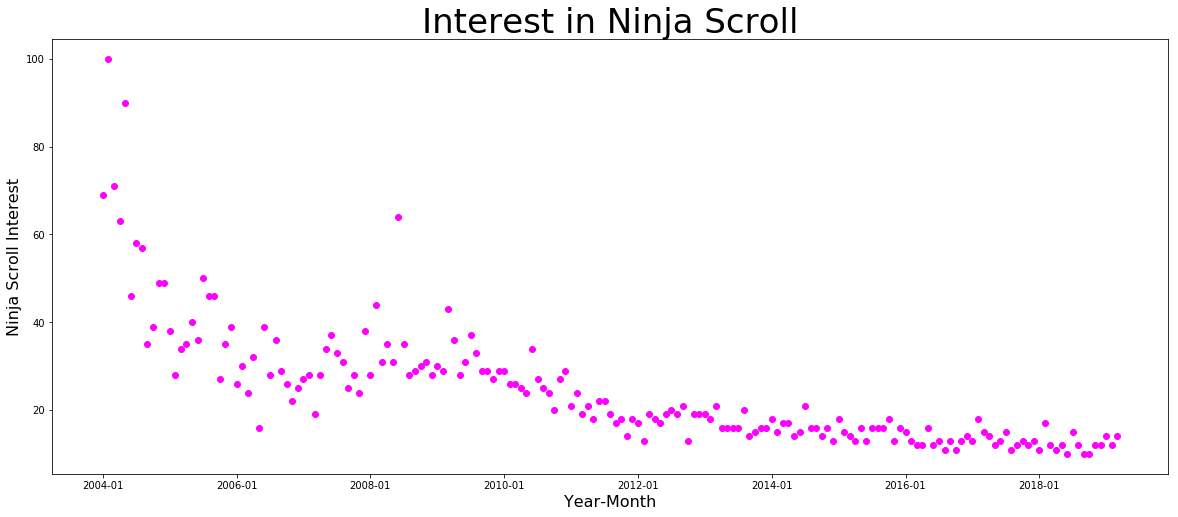

In [363]:
dfns = pd.read_csv("Ninja_Scroll.csv", names = ["Date", "Interest"])
dfns = dfns.drop([0,1,185])
dfns[['Year','Month']] = df.Date.str.split("-",expand=True,)
cols = dfns.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]
dfns = dfns[cols]

dfns.Interest = dfns.Interest.astype(np.int64)
dfns.Year = dfns.Year.astype(np.int64)
dfinterest = dfns['Interest']
interest = list(dfinterest)
dfdate = dfns['Date']
date = list(dfdate)

fig, ax = plt.subplots(figsize=(20,8))
plt.xticks(pos,Sxdate);
plt.scatter(x = date, y = interest, color = 'magenta');
ax.set_title("Interest in Ninja Scroll", fontsize = 34);
ax.set_xlabel("Year-Month", fontsize = 16);
ax.set_ylabel("Ninja Scroll Interest", fontsize = 16);


**Part B:** Based on your figure from Part A, formulate a hypothesis regarding whether or not a statistically significant linear trend exists. Clearly state your null and alternative hypotheses, and the level of significance you will use for this hypothesis test. If you have reason to believe some kind of a trend that is *not linear* exists, say so.

**ANSWER PART B**

My hypothesis is that there is a linear trend in the data. i.e. interest in Ninja Scroll has decreased since 2004. I will test my hypothesis at the 95% level of significance.

$H_0: \beta = 0$ There is no linear trend in the data.

$H_1: \beta < 0$ there is a linear trend in the data.

**Part C:** Perform any processing that you need to do in order to satisfy the assumptions of the simple linear regression model. If you do not do any processing, then explain why you believe your data set already satisfies these assumptions (and clearly state the assumptions).

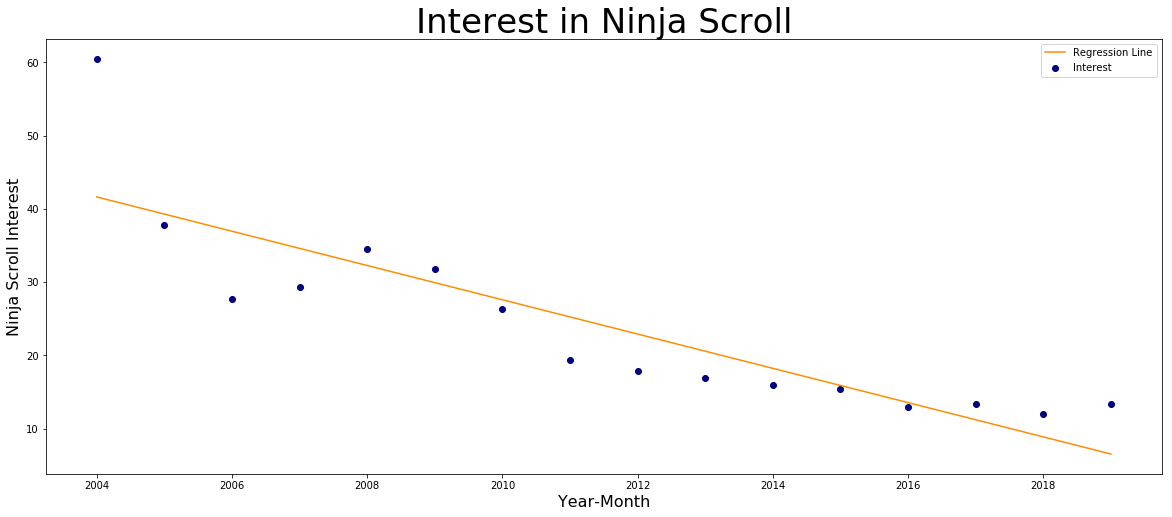

In [364]:
meanlist2 = []
for i in range (16):
    df2 = dfns.loc[dfns['Year'] == (i+2004)]
    meanlist2.append(df2.Interest.mean())

data2 = [[2004,meanlist2[0]], [2005,meanlist2[1]], [2006,meanlist2[2]], [2007,meanlist2[3]], [2008,meanlist2[4]], [2009,meanlist2[5]], [2010,meanlist2[6]], [2011,meanlist2[7]], [2012,meanlist2[8]], [2013,meanlist2[9]], [2014,meanlist2[10]], [2015,meanlist2[11]], [2016,meanlist2[12]], [2017,meanlist2[13]], [2018,meanlist2[14]], [2019,meanlist2[15]]]
dfmeanYear = pd.DataFrame(data2, columns = ['Year', 'Interest'])

dfmeanYear

slope, intercept, r_value, p_value, std_err = stats.linregress(dfmeanYear["Year"], dfmeanYear["Interest"])

x = dfmeanYear['Year']
y = dfmeanYear['Interest']
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(20,8))
ax.scatter(x,y,marker='o',color = 'navy',label="Interest")
ax.plot(x,intercept+x*slope,color = 'darkorange',label="Regression Line")
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)
ax.set_title("Interest in Ninja Scroll", fontsize = 34);
ax.set_xlabel("Year-Month", fontsize = 16);
ax.set_ylabel("Ninja Scroll Interest", fontsize = 16);
plt.legend();


**ANSWER PART C**

**Assumptions**

A. Our y value at any given point is equal to our intercept plus the slope times our corresponding x point plus the uncertainty at that point

B. Each uncertainty $\epsilon_i$ is independent of one another

C. Each $\epsilon_i$ will fall within the normal distribution from 0 to our variance.

While A and B were satisfied with the original data, I needed to take the mean of each year, like we did in problem 3, in order to satisfy the conditions of C because outliers in the original data would have fallen outside of the normal distribution.

**Part D:** Compute **by hand** the p-value associated with the hypothesis test from Part B. Clearly state your conclusion. You may use `scipy.stats.linregress` to check your answer, and you may use Python as a calculator (and to get critical values, for example), but you need to show all your work by hand.

In [365]:
meany = np.mean(meanlist2)
xs = [2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
meanx = np.mean(xs)

num = 0
den = 0
for i in range (16):
    num = num+((xs[i]-meanx)*(meanlist2[i]-meany))
    den = den+((xs[i]-meanx)**2)

bhat = num/den     
alphahat = meany - (bhat*meanx)

sse = 0
sst = 0
ssr = 0


for i in range (16):
    sse = sse + ((meanlist2[i] - (alphahat + (bhat*xs[i])))**2)
    sst = sst + ((meanlist2[i] - meany)**2)
    ssr = ssr + ((xs[i] - meanx)**2)

ssr = np.sqrt(ssr)
sighat = np.sqrt(sse/14)

seb = sighat/ssr

t = (bhat - 0)/seb

tcrit = stats.t.ppf(.975, df = 14)
print(abs(t),tcrit)

6.483214732496126 2.1447866879169273


**ANSWER PART D**

Because the absolute value of t (6.483) is greater than $t_{crit}$ (2.145), we reject the null hypothesis and conclude that there is a linear trend in the data.